In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lr-img/seq317.jpg
/kaggle/input/lr-img/seq123.jpg
/kaggle/input/segmentation-model-weights/seq115.jpg
/kaggle/input/segmentation-model-weights/best_model.pth
/kaggle/input/segmentation-model-weights/generator.h5
/kaggle/input/segmentation-model-weights/seq317.jpg
/kaggle/input/segmentation-model-weights/seq123.jpg


# Importing Libraries for FSRGAN

In [2]:
import glob
import tensorflow as tf
from keras.models import Model
import keras

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# FSRGAN Implementation

In [3]:
!git clone https://github.com/AnaghBenjwal/Fast-SRGAN

Cloning into 'Fast-SRGAN'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 118 (delta 2), reused 7 (delta 2), pack-reused 109
Receiving objects: 100% (118/118), 1.23 MiB | 22.81 MiB/s, done.
Resolving deltas: 100% (59/59), done.


# Importing libraries for Image segmentation

In [4]:
import torch
import torch.nn as nn
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import matplotlib.pyplot as plt


# Sgmentation model

In [5]:
!pip install -U git+https://github.com/qubvel/segmentation_models.pytorch


  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-kqja468n
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-kqja468n
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit e5d3db20e9c2ddb76f88642409e527239943c983
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.3-py3-none-any.whl size=106725 sha256=a7fe7f62d2245c5ea14923390e994ce14a36ad9972f4a2258b472b70d97f4d15
  Stored in directory: /tmp/pip-ephem-wheel-cache-ern10bxg/wheels/1a/49/5f/858bc2741660e381e83f1d8b297edc4d9f0561f29becaee577
  Created wheel for efficientnet-pyt

In [6]:
import segmentation_models_pytorch as smp
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:

ENCODER = 'se_resnext50_32x4d'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['safe']
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.UnetPlusPlus(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/se_resnext50_32x4d-a260b3a4.pth" to /root/.cache/torch/hub/checkpoints/se_resnext50_32x4d-a260b3a4.pth
100%|██████████| 105M/105M [05:10<00:00, 356kB/s]  


In [8]:
best_model = torch.load('/kaggle/input/segmentation-model-weights/best_model.pth')

# Image upscaling

In [9]:
rm -r /kaggle/working/LR_img/

rm: cannot remove '/kaggle/working/LR_img/': No such file or directory


In [10]:
!mkdir LR_img
!mkdir HR_img
!cp -r /kaggle/input/lr-img /kaggle/working/LR_img

In [15]:
!python /kaggle/working/Fast-SRGAN/infer.py --image_dir '/kaggle/working/LR_img/lr-img' --output_dir '/kaggle/working/HR_img' --model_dir /kaggle/input/segmentation-model-weights/generator.h5


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

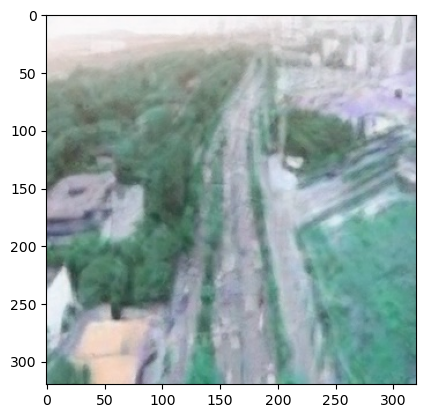

In [26]:
img= cv2.imread('/kaggle/working/HR_img/seq123.jpg')
plt.imshow(img)

# Image segmentation prediction

In [21]:
!mkdir imgseg_pred

In [22]:
def visualize_and_save(**images):
    """PLot images in one row."""
    n = len(images)
#     plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
#         plt.subplot(1, n, i + 1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.title(' '.join(name.split('_')).title())
#         if i == 0:
#             plt.imshow(image)
        if i != 0:
            plt.imshow(image, cmap='gray')
#             plt.savefig('/kaggle/working/testoutput/ogimg1.png')
            image = image.astype(np.uint8)
#             print(image)
            image = image*255
            image = cv2.bitwise_not(image)
#             print(image.shape)
            cv2.imwrite('/kaggle/working/imgseg_pred/output.png', image)
    plt.show()

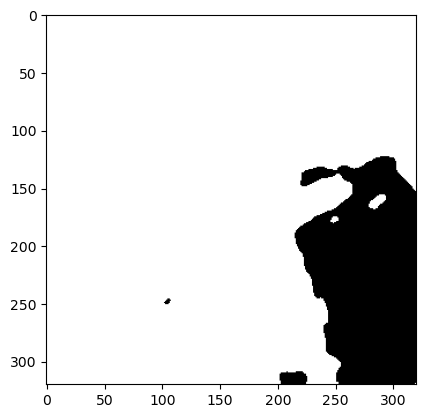

In [23]:
def image_loader(image_name):
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_pre = preprocessing_fn(image)
    image_vis = image.astype('uint8')
    x_tensor = torch.from_numpy(image_pre.transpose(2,0,1).astype('float32')).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
    return image, pr_mask
image, pr_mask = image_loader('/kaggle/working/HR_img/seq123.jpg')
visualize_and_save(image=image, predicted=pr_mask)

# Landing Zone detection

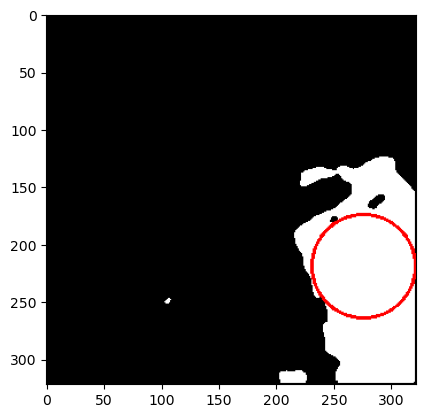

In [24]:
img0 = cv2.imread("/kaggle/working/imgseg_pred/output.png")
img0 = cv2.copyMakeBorder(img0, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=(0, 0, 0))

img= img0
img0 = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)
img0mc = cv2.morphologyEx(img0, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))
img0m = cv2.morphologyEx(img0mc, cv2.MORPH_OPEN, np.ones((9,9), np.uint8))
_, imgbin0 = cv2.threshold(img0, 0, 255, cv2.THRESH_BINARY)
imgdist0 = cv2.distanceTransform(imgbin0, cv2.DIST_L2, 5, cv2.DIST_MASK_PRECISE)
_, max_val0, _, centre0 = cv2.minMaxLoc(imgdist0)
alpha = 0.4
circle0 = cv2.circle(img, centre0, int(max_val0), (255, 0, 0), 2)
# cv2.imshow('PaperPictures/finaltest/LR1_final.png', circle0)
plt.imshow(circle0)

(-0.5, 321.5, 321.5, -0.5)

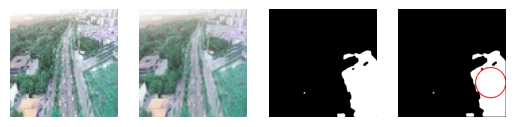

In [33]:
pred = cv2.imread('/kaggle/working/imgseg_pred/output.png')
lowres = cv2.imread('/kaggle/working/LR_img/lr-img/seq123.jpg')

plt.subplot(1,4,1)
plt.imshow(lowres)
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(pred)
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(circle0)
plt.axis('off')